In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Resume.csv")
data

Resumes  \
0   Name: Ravali P \n\n\n\n                       ...   
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3   HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....   
..                                                ...   
74  Workday Integration Consultant\n\n\n\nName    ...   
75  Srikanth (WORKDAY hCM Consultant)\t           ...   
76  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...   
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   
78  Vinay kumar .v\nWorkday Functional Consultant\...   

                     Category  
0   React JS Developer Resume  
1   React JS Developer Resume  
2   React JS Developer Resume  
3   React JS Developer Resume  
4   React JS Developer Resume  
..                        ...  
74             Workday Resume  
75             Workday Resume  
76             Workday Resume  
77             Workday Resume  
78             Workday Resume  

[79 rows x 2 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [4]:
data.shape

(79, 2)

In [5]:
## checking null values
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [6]:
## checking duplicated values
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

# HOW TO CLEAN OUR DATA FOR NLP

1. Remove punctuation
2. Tokenize
3. Remove stop words
4. Stem
5. Lemmatize

## 1. Remove punctuation
- We need to remove all special characters. 
- For example : “How are you?” ------> becomes: How are you

In [7]:
## Remove punctuation using string

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
## function to remove punctuation

def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])   # It will discord all punctuations
    return text_nopunct

data['Resumes_text_clean'] = data['Resumes'].apply(lambda x: remove_punct(x))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  
0  Name Ravali P \n\n\n\n                        ...  
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...  
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...

## 2.TOKENIZE

- In other words,this function gives structure to previously unstructured text.
- For example: Plata o Plomo -----> becomes ‘Plata’,’o’,’Plomo’.

In [9]:
## Tokenization using regular expressions
import re

## function to tokenize words
def tokenize(text):
    token = re.split('\W+',text) # W+ ---> Eather a word character(A-Za_z0-9) or dash(-) can go there
    return token

data['Resumes_text_tokenized'] = data['Resumes_text_clean'].apply(lambda x: tokenize(x.lower()))
# We convert to lower as python is case-sensitive
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  
0  [name, ravali, p, curriculum, vitae, specializ...  
1  [susovan, bag, seeking, a, challenging, positi...  
2  [kanumuru, deepak, reddy, career, objective, t...  
3  [haripriya, battina, experience, as, ui, devel...  
4  [kamalakar, reddy, a, linked, in, httpswwwlink...

## 3. REMOVE STOP WORDS

- Stop words are common words that will likely appear in any text.They don’t tell us much about our data so we remove them. 
- For example: silver or lead is fine for me -----> becomes silver, lead, fine.

In [10]:
import nltk
stopword = nltk.corpus.stopwords.words('english') # all english stopwords
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
## function to remove stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]  # to remove all stopwords
    return text

data['Resumes_text_nostop'] = data['Resumes_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, a, challenging, positi...   
2  [kanumuru, deepak, reddy, career, objective, t...   
3  [haripriya, battina, experience, as, ui, devel...   
4  [kamalakar, reddy, a, linked, in, httpswwwlink...   

                                 Resumes_text_nostop  
0  [name, ravali, p, curriculum, vitae, specializ...  
1  [susovan, bag, seeking, challenging, position,...  
2  [kanumuru, deepak, reddy, career, objective, s...  
3  [haripriya, battina, experience, ui, developer...  
4  [kamalakar, reddy, linked, httpswwwlinkedincom...

## 4. STEM

- Stemming helps reduce a word to its stem form. It removes suffixes like “ing,” “ly,” “s” by a simple rule-based approach. Stemming reduces the corpus of words but often the actual words are lost, in a sense. 

- For example: “Entitling” or  “Entitled” -----> become  “Entitl.”

#### Preprocesing data using steming

In [12]:
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text 

data['Resumes_text_stemed'] = data['Resumes_text_nostop'].apply(lambda x: stemming(x))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, a, challenging, positi...   
2  [kanumuru, deepak, reddy, career, objective, t...   
3  [haripriya, battina, experience, as, ui, devel...   
4  [kamalakar, reddy, a, linked, in, httpswwwlink...   

                                 Resumes_text_nostop  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, challenging, position,...   
2  [kanumuru, deepak, reddy, career, objective, s...   
3  [haripriya, battina, experience, ui, developer...   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...   

                                 Resumes_text_stemed  
0  [name, ravali, p, curriculum, vita, special, c...  
1  [susovan, bag, seek, challeng, posit, field, s...  
2  [kanumuru, deepak, reddi, career, object, secu...  
3  [haripriya, battina, experi, ui, develop, reac...  
4  [kamalakar, reddi, link, httpswwwlinkedincomin...

## 5. LEMMATIZE

- Lemmatizing derives the root form (“lemma”) of a word. This practice is more robust than stemming because it uses a dictionary-based approach (i.e a morphological analysis) to the root word. 
- For example, “Entitling” or “Entitled” become “Entitle.”
- In short, stemming is typically faster as it simply chops off the end of the word, but without understanding the word’s context. Lemmatizing is slower but more accurate because it takes an informed analysis with the word’s context in mind.

#### Preprocesing data using lematizer

In [13]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['Resumes_text_lemmatized'] = data['Resumes_text_nostop'].apply(lambda x: lemmatizing(x))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, a, challenging, positi...   
2  [kanumuru, deepak, reddy, career, objective, t...   
3  [haripriya, battina, experience, as, ui, devel...   
4  [kamalakar, reddy, a, linked, in, httpswwwlink...   

                                 Resumes_text_nostop  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, challenging, position,...   
2  [kanumuru, deepak, reddy, career, objective, s...   
3  [haripriya, battina, experience, ui, developer...   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...   

                                 Resumes_text_stemed  \
0  [name, ravali, p, curriculum, vita, special, c...   
1  [susovan, bag, seek, challeng, posit, field, s...   
2  [kanumuru, deepak, reddi, career, object, secu...   
3  [haripriya, battina, experi, ui, develop, reac...   
4  [kamalakar, reddi, link, httpswwwlinkedincomin...   

                             Resumes_text_lemmatized  
0  [name, ravali, p, curriculum, vitae, specializ...  
1  [susovan, bag, seeking, challenging, position,...  
2  [kanumuru, deepak, reddy, career, objective, s...  
3  [haripriya, battina, experience, ui, developer...  
4  [kamalakar, reddy, linked, httpswwwlinkedincom...

# METHODS OF VECTORIZING DATA FOR NLP

- Bag-of-Words
- N-Grams
- TF-IDF

## 1. Bag-of-Words (BoW) or CountVectorizer

- It describes the presence of words within the text data.This process gives a result of one if present in the sentence and zero if absent.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [15]:
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['Resumes'])
print(X_counts.shape)
print(count_vect.get_feature_names_out())

(79, 66)
['\t' '\n' ' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '\xa0']


## 2. N-GRAMS

- N-grams are simply all combinations of adjacent words or letters of length n that we find in our source text. N-grams with n=1 are called unigrams, n=2 are bigrams, and so on. 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['Resumes'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(79, 66)
['\t' '\n' ' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '\xa0']


C:\Users\HP\.anaconda\lib\site-packages\sklearn\feature_extraction\text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


## 3. TF-IDF

- TF-IDF computes the relative frequency with which a word appears in a document compared to its frequency across all documents. It’s more useful than term frequency for identifying key words in each document (high frequency in that document, low frequency in other documents).

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['Resumes'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(79, 66)
['\t' '\n' ' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '\xa0']


# Feature Engineering

### FEATURE CREATION

- Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Because feature engineering requires domain knowledge, feature can be tough to create, but they’re certainly worth our time.

In [18]:
## create feature for text resumes length and % of punctuation in text

# functuation to calculate length of resumes excluding space
data['Resumes_len'] = data['Resumes'].apply(lambda x: len(x) - x.count(" "))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, a, challenging, positi...   
2  [kanumuru, deepak, reddy, career, objective, t...   
3  [haripriya, battina, experience, as, ui, devel...   
4  [kamalakar, reddy, a, linked, in, httpswwwlink...   

                                 Resumes_text_nostop  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, challenging, position,...   
2  [kanumuru, deepak, reddy, career, objective, s...   
3  [haripriya, battina, experience, ui, developer...   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...   

                                 Resumes_text_stemed  \
0  [name, ravali, p, curriculum, vita, special, c...   
1  [susovan, bag, seek, challeng, posit, field, s...   
2  [kanumuru, deepak, reddi, career, object, secu...   
3  [haripriya, battina, experi, ui, develop, reac...   
4  [kamalakar, reddi, link, httpswwwlinkedincomin...   

                             Resumes_text_lemmatized  Resumes_len  
0  [name, ravali, p, curriculum, vitae, specializ...         4381  
1  [susovan, bag, seeking, challenging, position,...         1369  
2  [kanumuru, deepak, reddy, career, objective, s...         3482  
3  [haripriya, battina, experience, ui, developer...         2266  
4  [kamalakar, reddy, linked, httpswwwlinkedincom...         2316

####  
- Resumes_len shows the length of words excluding whitespaces in a resumes body.
- punct% shows the percentage of punctuation marks in a resumes body.

In [19]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['Resumes'].apply(lambda x: count_punct(x))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, a, challenging, positi...   
2  [kanumuru, deepak, reddy, career, objective, t...   
3  [haripriya, battina, experience, as, ui, devel...   
4  [kamalakar, reddy, a, linked, in, httpswwwlink...   

                                 Resumes_text_nostop  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, challenging, position,...   
2  [kanumuru, deepak, reddy, career, objective, s...   
3  [haripriya, battina, experience, ui, developer...   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...   

                                 Resumes_text_stemed  \
0  [name, ravali, p, curriculum, vita, special, c...   
1  [susovan, bag, seek, challeng, posit, field, s...   
2  [kanumuru, deepak, reddi, career, object, secu...   
3  [haripriya, battina, experi, ui, develop, reac...   
4  [kamalakar, reddi, link, httpswwwlinkedincomin...   

                             Resumes_text_lemmatized  Resumes_len  punct%  
0  [name, ravali, p, curriculum, vitae, specializ...         4381     2.2  
1  [susovan, bag, seeking, challenging, position,...         1369     5.6  
2  [kanumuru, deepak, reddy, career, objective, s...         3482     3.9  
3  [haripriya, battina, experience, ui, developer...         2266     3.9  
4  [kamalakar, reddy, linked, httpswwwlinkedincom...         2316     5.4

# Data visualisation

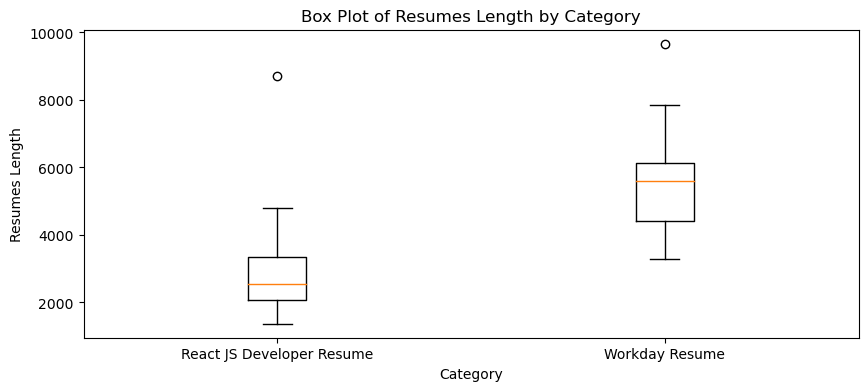

In [20]:
categories = ['React JS Developer Resume','Workday Resume']

category_data = [data[data['Category'] == category]['Resumes_len'] for category in categories]

fig, ax = plt.subplots(figsize=(10, 4))
ax.boxplot(category_data, labels=categories)
ax.set_xlabel('Category')
ax.set_ylabel('Resumes Length')
ax.set_title('Box Plot of Resumes Length by Category')
plt.show()

<Axes: xlabel='count', ylabel='Category'>

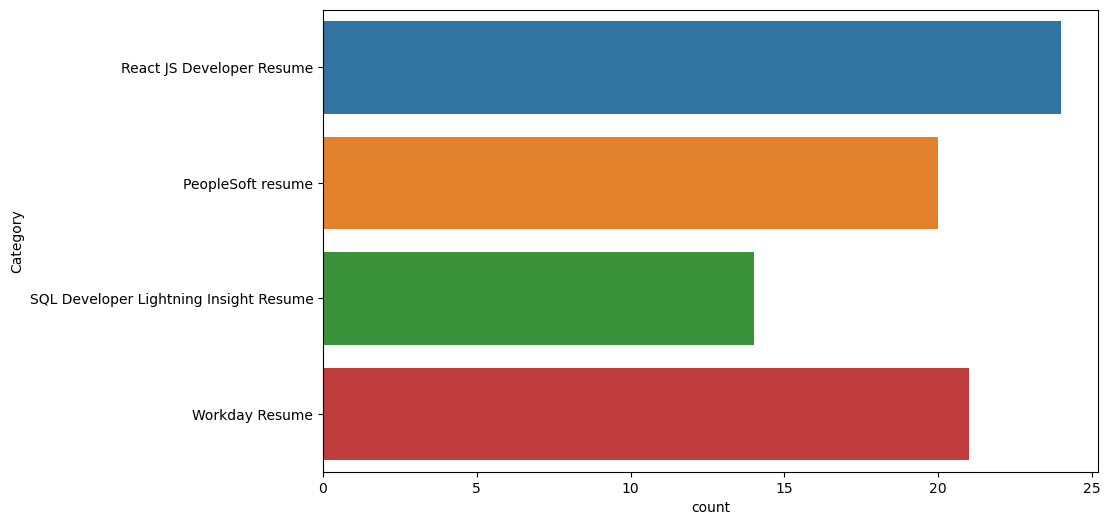

In [21]:
## count plot
plt.figure(figsize=(10,6))
plt.xticks()
sns.countplot(y="Category", data=data)

<Figure size 10000x5000 with 0 Axes>

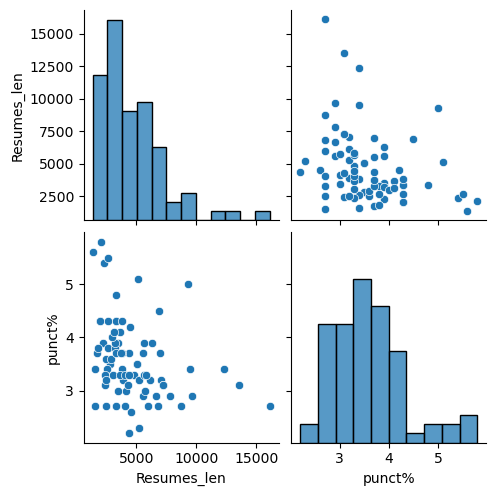

In [22]:
plt.figure(figsize=(20,10),dpi=500)
sns.pairplot(data = data)

In [23]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['Resumes_text_lemmatized'] = data['Resumes_text_nostop'].apply(lambda x: lemmatizing(x))
data.head()

Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, a, challenging, positi...   
2  [kanumuru, deepak, reddy, career, objective, t...   
3  [haripriya, battina, experience, as, ui, devel...   
4  [kamalakar, reddy, a, linked, in, httpswwwlink...   

                                 Resumes_text_nostop  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, challenging, position,...   
2  [kanumuru, deepak, reddy, career, objective, s...   
3  [haripriya, battina, experience, ui, developer...   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...   

                                 Resumes_text_stemed  \
0  [name, ravali, p, curriculum, vita, special, c...   
1  [susovan, bag, seek, challeng, posit, field, s...   
2  [kanumuru, deepak, reddi, career, object, secu...   
3  [haripriya, battina, experi, ui, develop, reac...   
4  [kamalakar, reddi, link, httpswwwlinkedincomin...   

                             Resumes_text_lemmatized  Resumes_len  punct%  
0  [name, ravali, p, curriculum, vitae, specializ...         4381     2.2  
1  [susovan, bag, seeking, challenging, position,...         1369     5.6  
2  [kanumuru, deepak, reddy, career, objective, s...         3482     3.9  
3  [haripriya, battina, experience, ui, developer...         2266     3.9  
4  [kamalakar, reddy, linked, httpswwwlinkedincom...         2316     5.4

In [24]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resumes_text_clean'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('PeopleSoft', 420), ('using', 385), ('Workday', 368), ('Experience', 327), ('Application', 287), ('experience', 233), ('SQL', 225), ('Server', 221), ('data', 217), ('Project', 216), ('reports', 185), ('business', 182), ('like', 180), ('HCM', 170), ('Worked', 168), ('Web', 160), ('Involved', 156), ('knowledge', 147), ('various', 143), ('People', 140), ('Reports', 138), ('Responsibilities', 136), ('issues', 130), ('application', 129), ('Database', 129), ('’', 126), ('EIB', 126), ('Tools', 125), ('Oracle', 125), ('system', 123), ('integrations', 122), ('Good', 121), ('Process', 121), ('Created', 120), ('Role', 119), ('creating', 118), ('Integration', 113), ('process', 112), ('React', 111), ('team', 110), ('Data', 109), ('server', 108), ('Core', 107), ('Windows', 105), ('database', 105), ('support', 105), ('Developer', 104), ('Client', 104), ('–', 103), ('Report', 101), ('working', 99), ('requirements', 98), ('new', 96), ('Studio', 93), ('I', 92), ('development', 90), ('Consultant', 90),

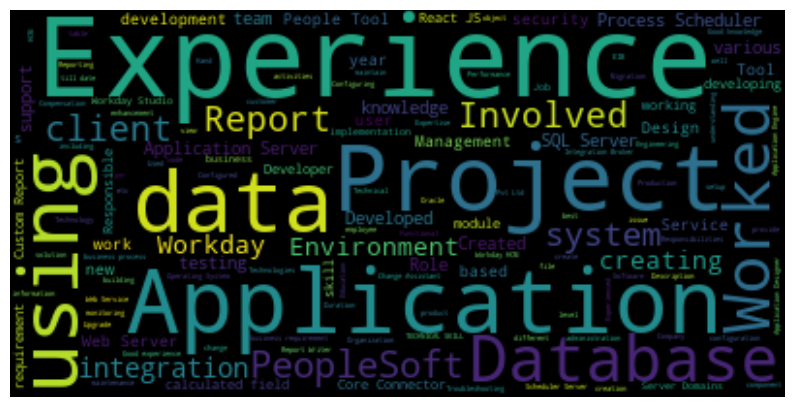

In [25]:
from wordcloud import WordCloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [27]:
data_categories = [data[data['Category'] == category].loc[:, ['Resumes_text_clean', 'Category']] for category in categories]
data_categories

[                                   Resumes_text_clean           Category
 24  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft resume
 25  G Ananda Rayudu \n\n\t\t        HYPERLINK http...  PeopleSoft resume
 26  PeopleSoft Database Administrator\n\n         ...  PeopleSoft resume
 27  Classification Internal\n\nClassification Inte...  PeopleSoft resume
 28  Priyanka Ramadoss\n\n\t6146 MountPleasant \n\n...  PeopleSoft resume
 29  SIRAZUDDIN M\n\n\tBangalore INDIA\t\n\n\n\n\n\...  PeopleSoft resume
 30  PEOPLESOFT ADMINISTRATOR\n\n\n\n\n\nSRINIVASK ...  PeopleSoft resume
 31  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft resume
 32  Vinod Akkala                                  ...  PeopleSoft resume
 33  PeopleSoft AdminPeopleSoft DBA\n\n\n\nGanesh A...  PeopleSoft resume
 34  PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft resume
 35  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...  PeopleSoft resume
 36  Personal Details\t\t\n\n\n\nName\

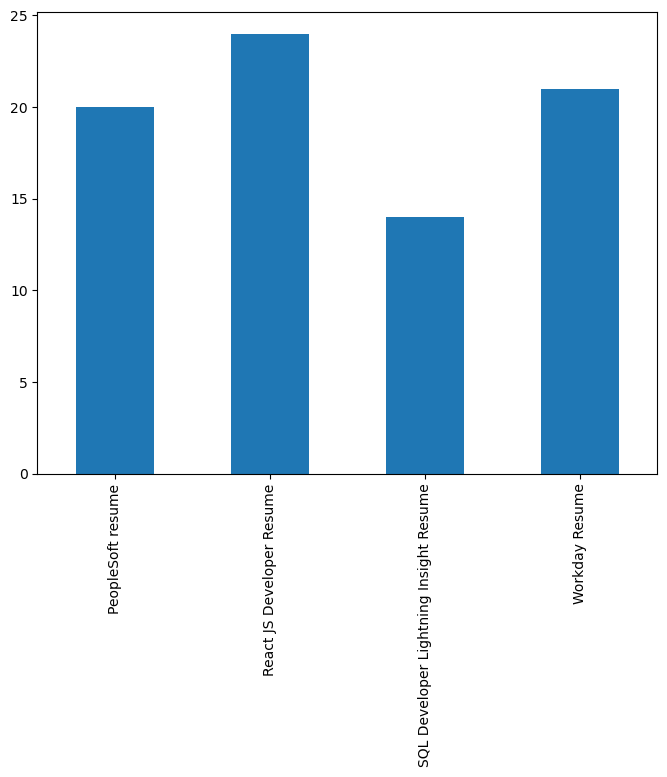

In [28]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.show()

In [29]:
def generate_wordcloud(all_words, Category):
    wordcloud = WordCloud(width=800, height=500,background_color='black',max_words=200,
                   colormap='Set1').generate(all_words)

    plt.figure(figsize=(14, 10), dpi=200)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Most Common Words in {} Resumes'.format(Category), fontsize = 16, fontweight = 'bold')
    plt.show()

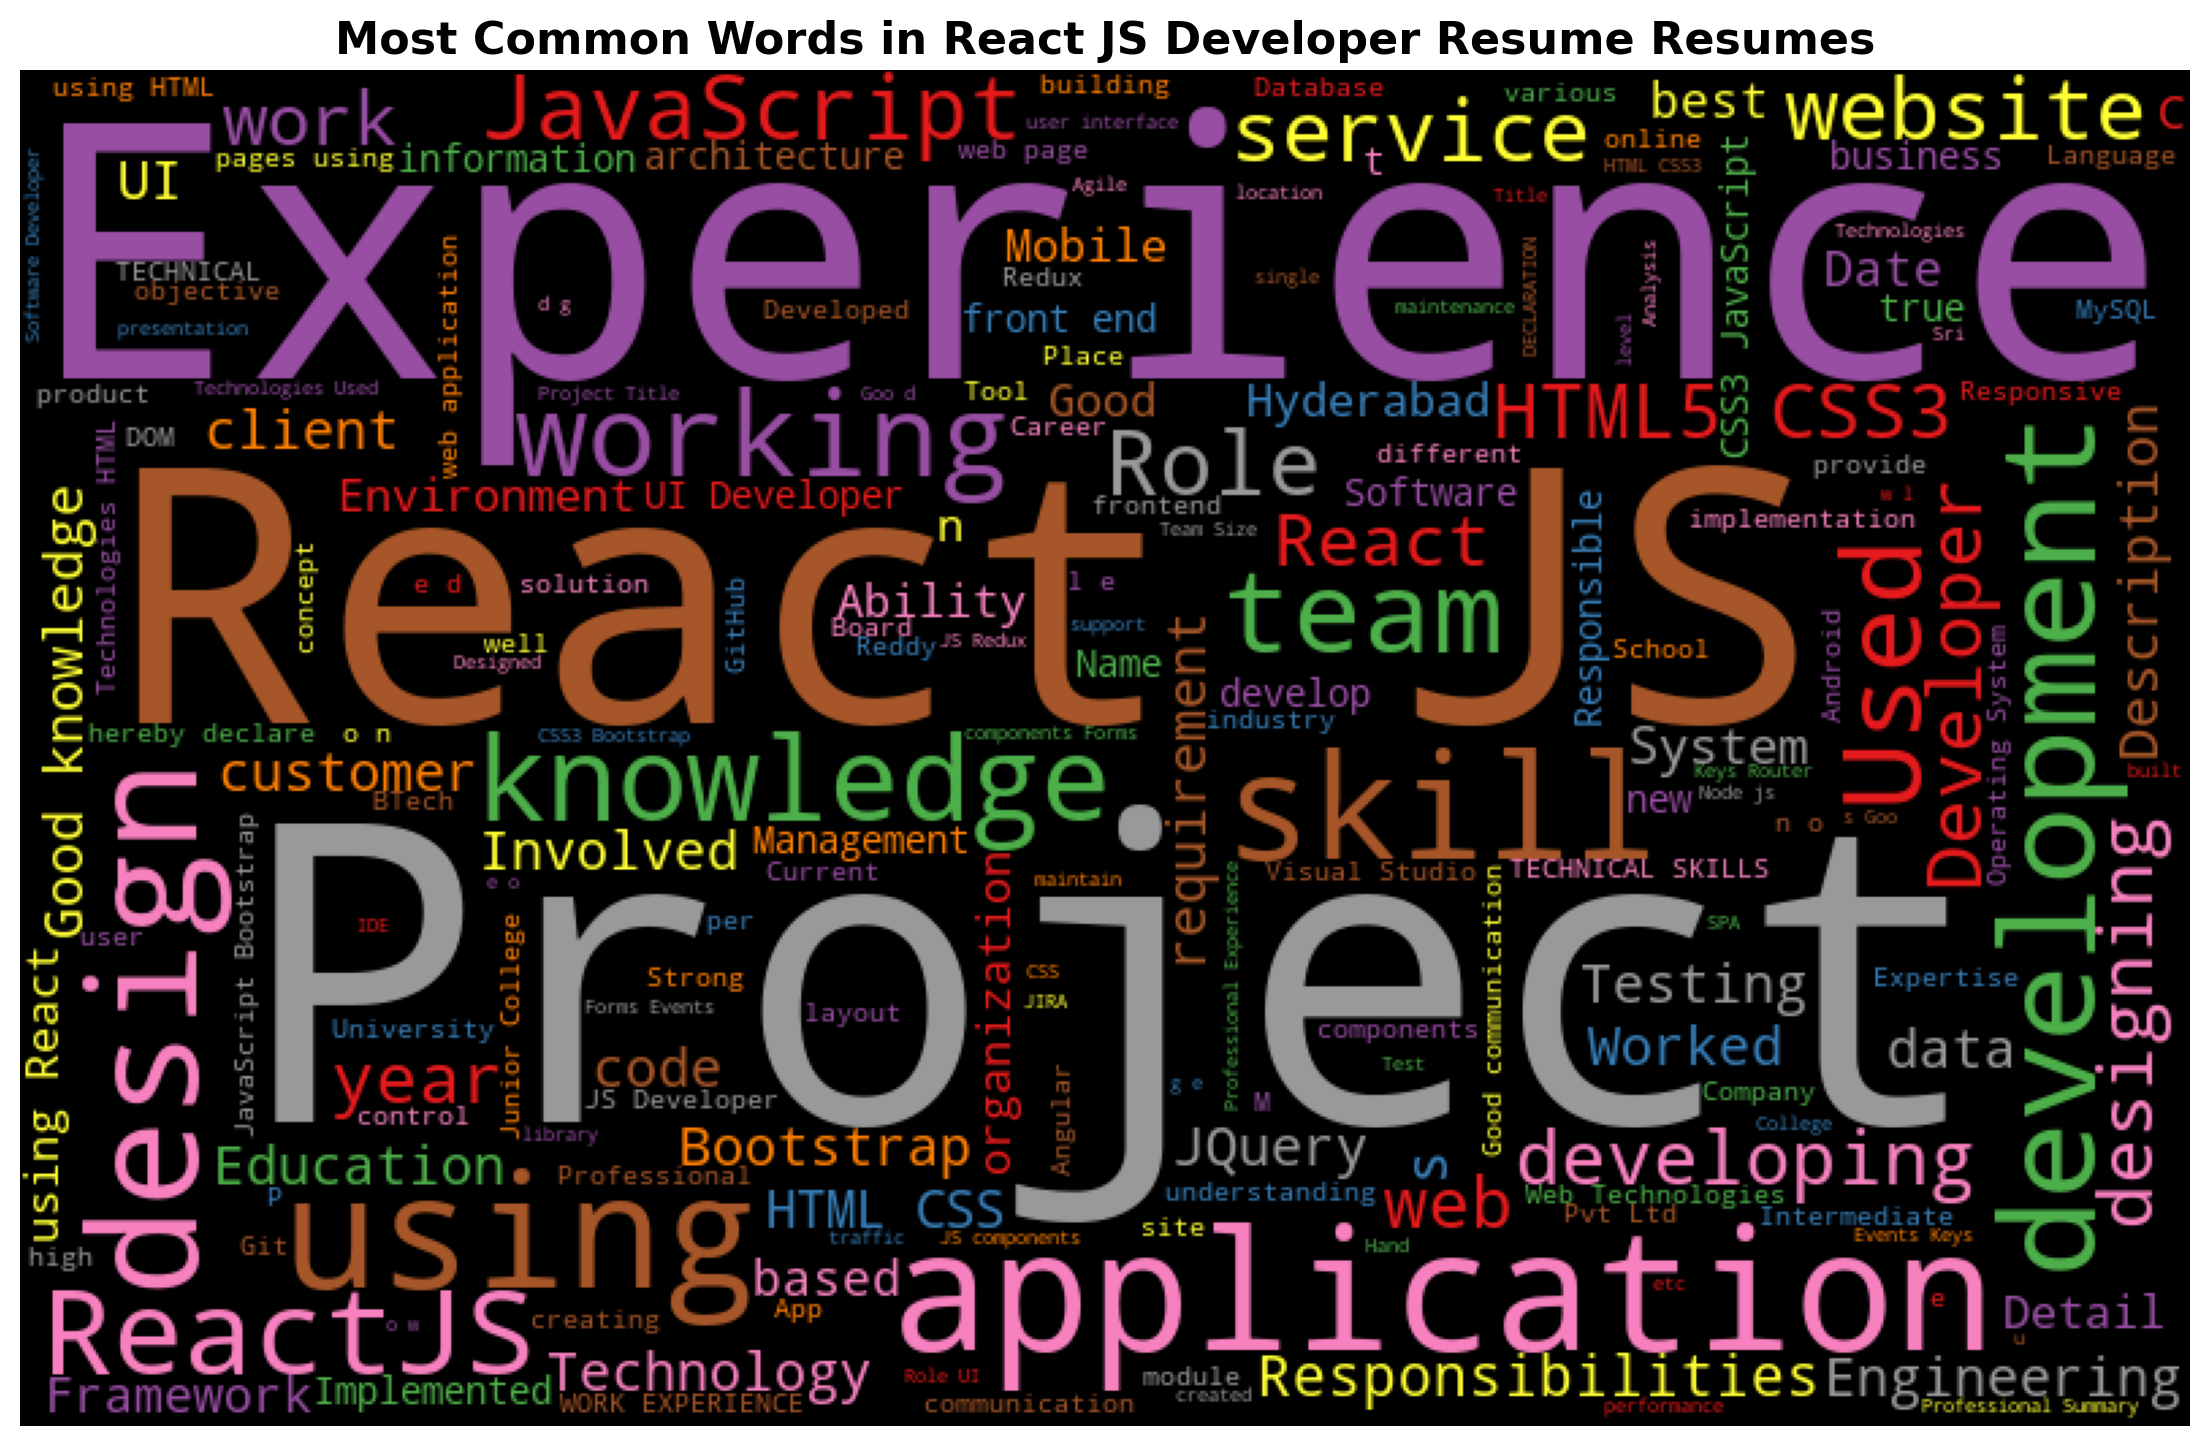

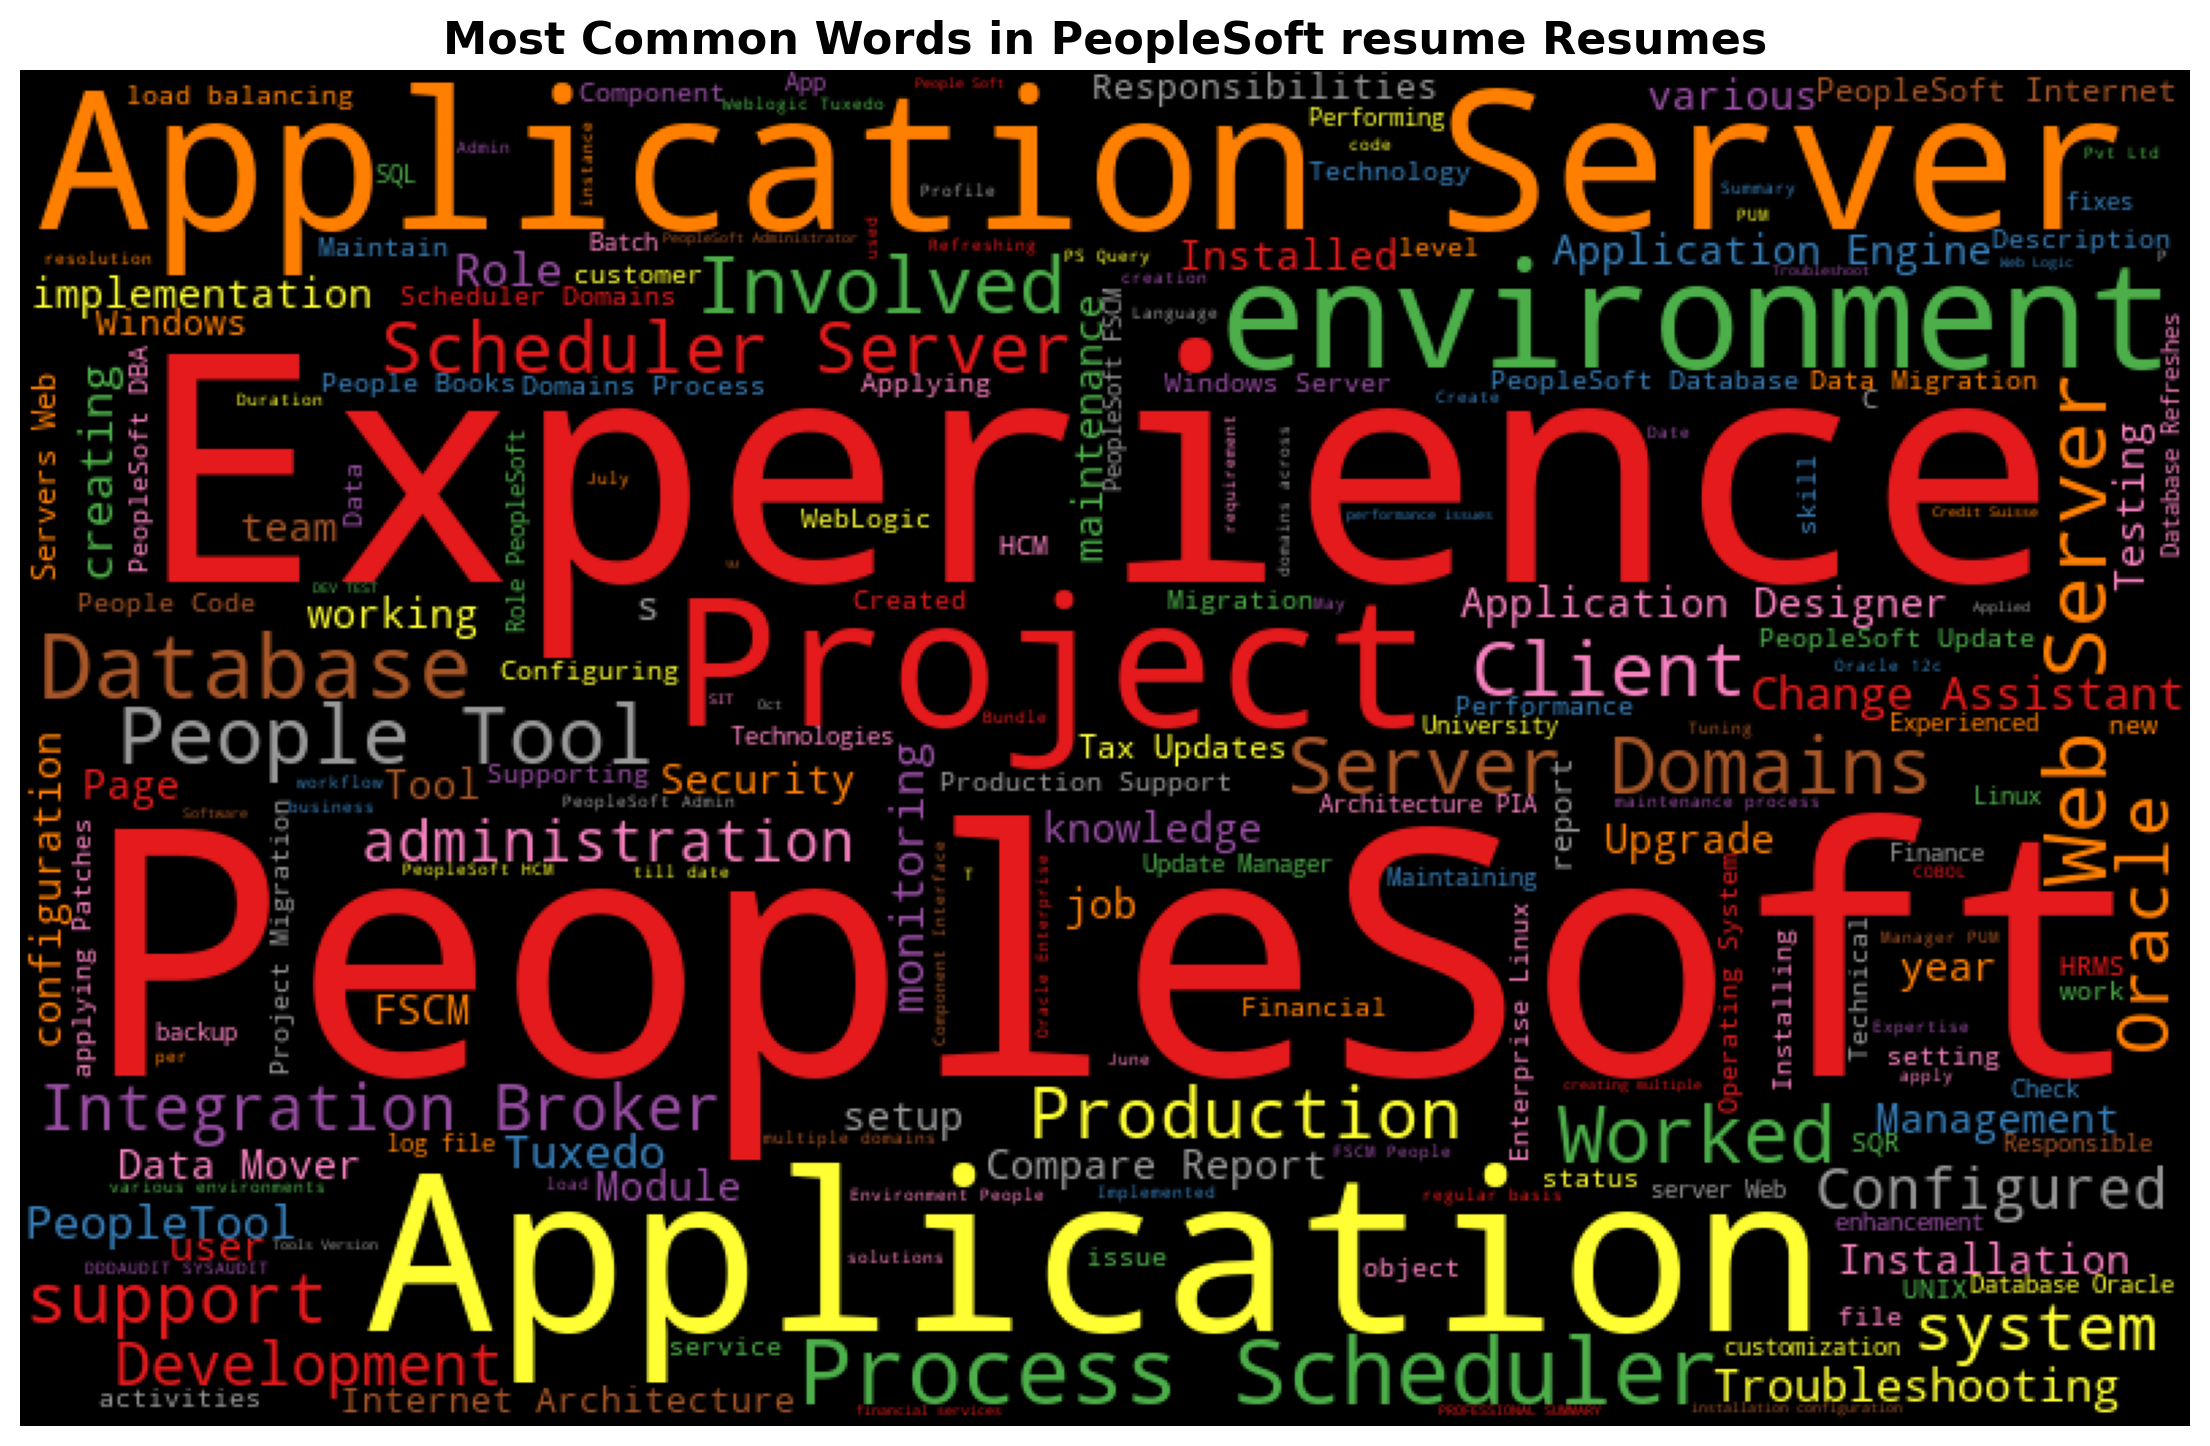

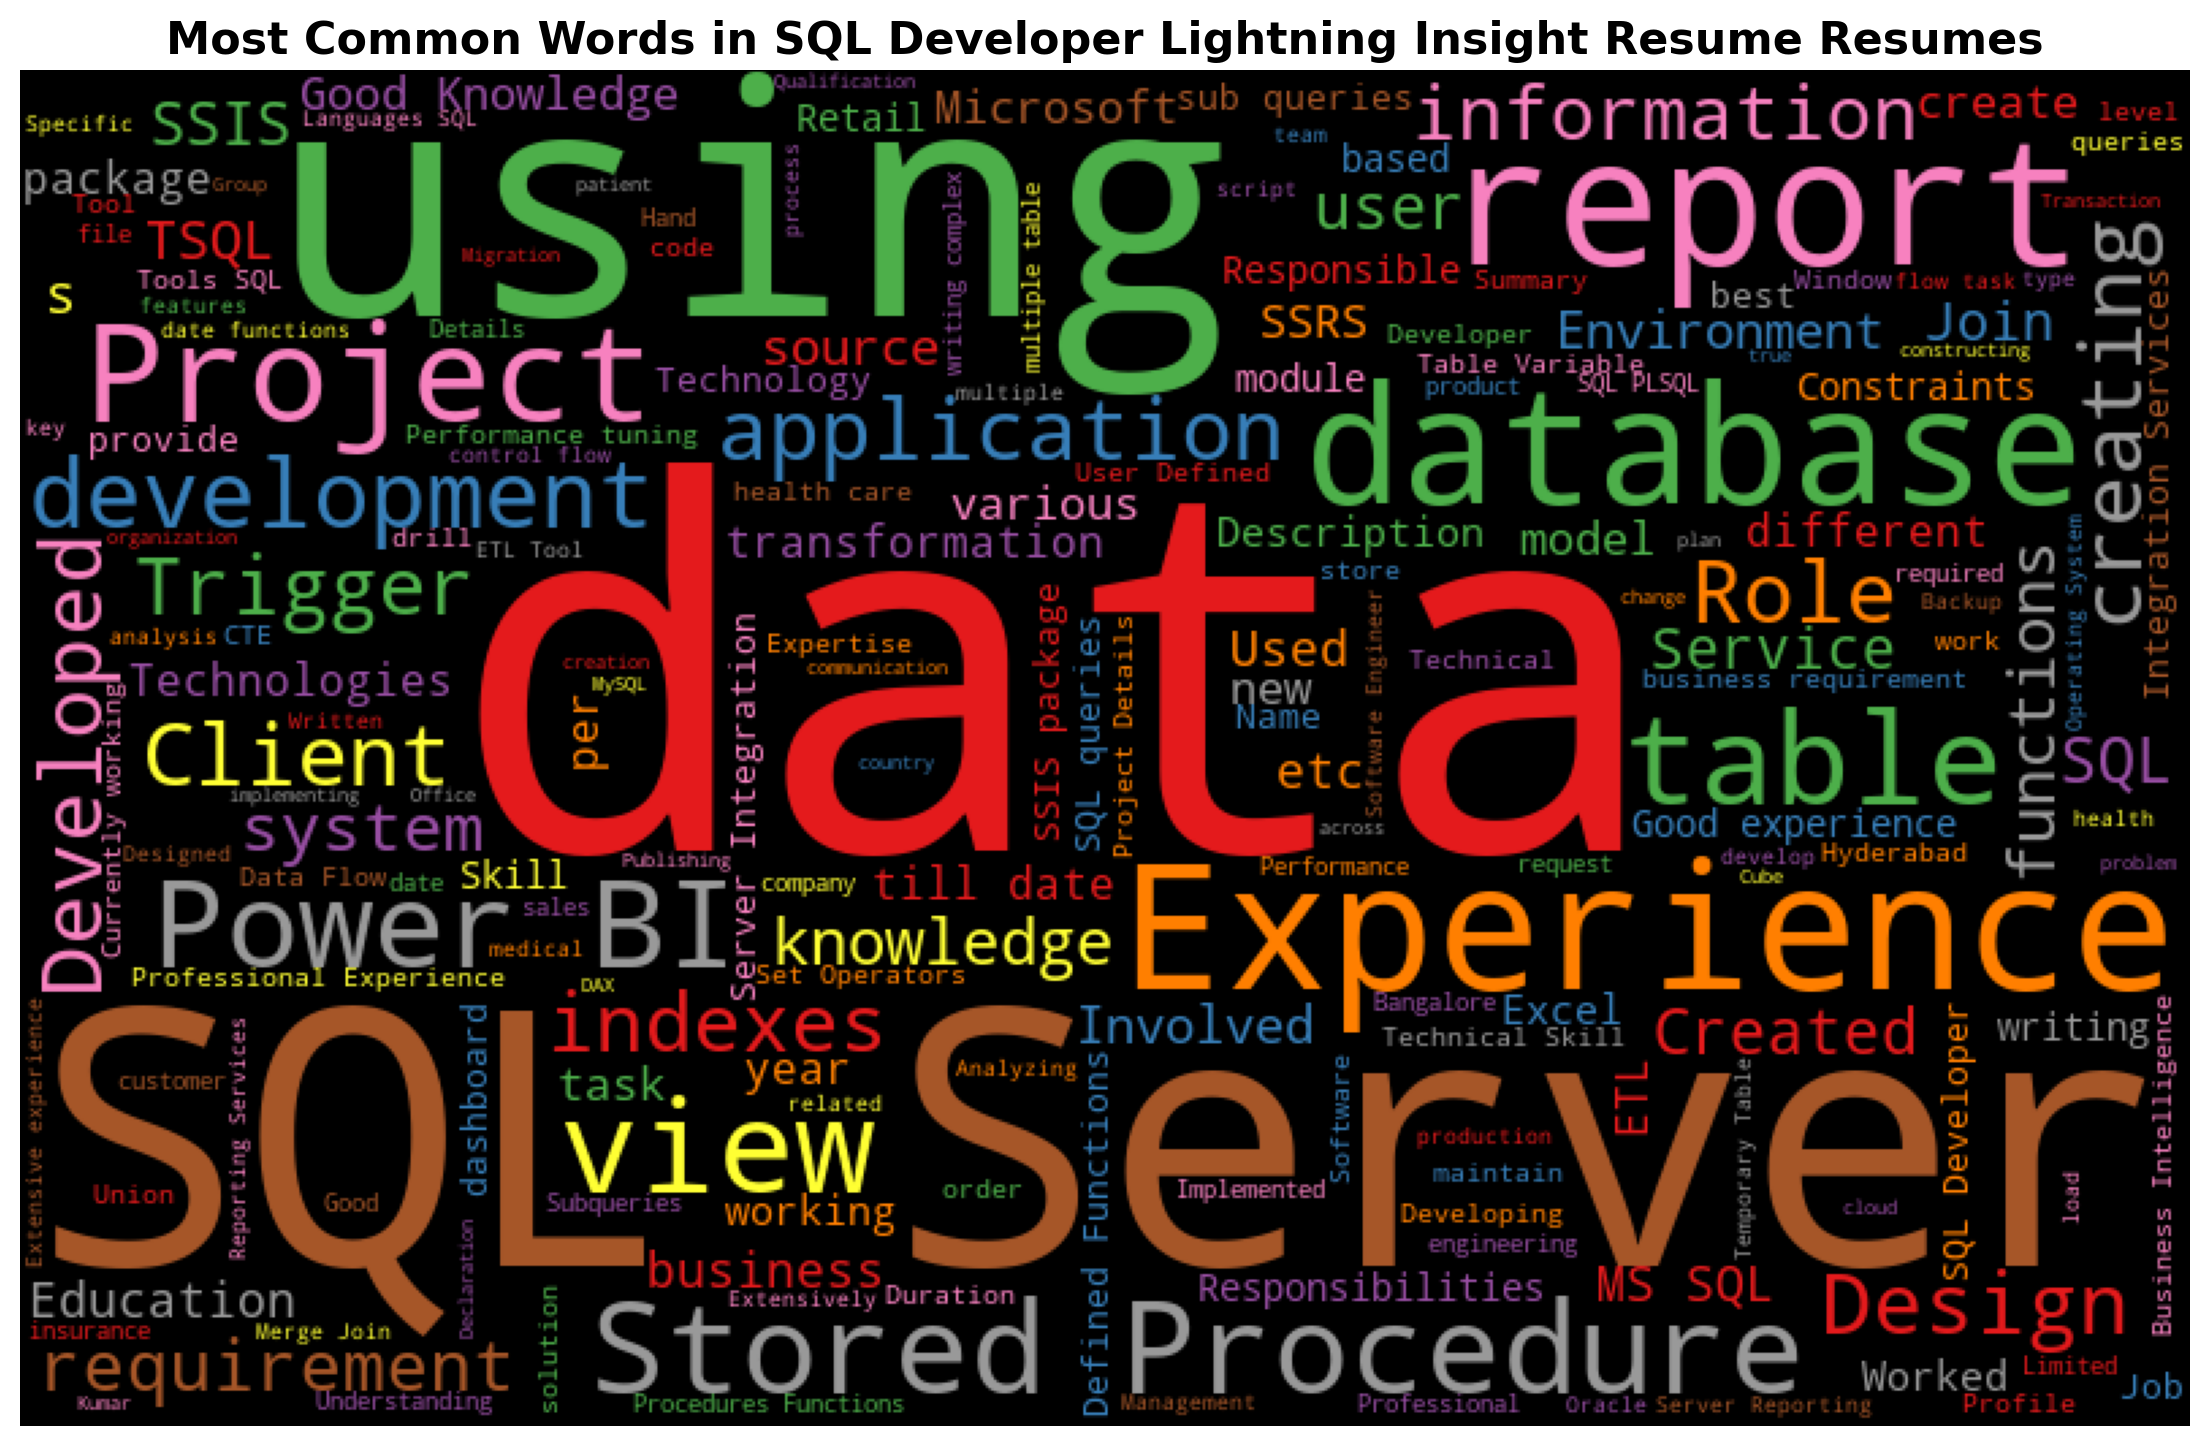

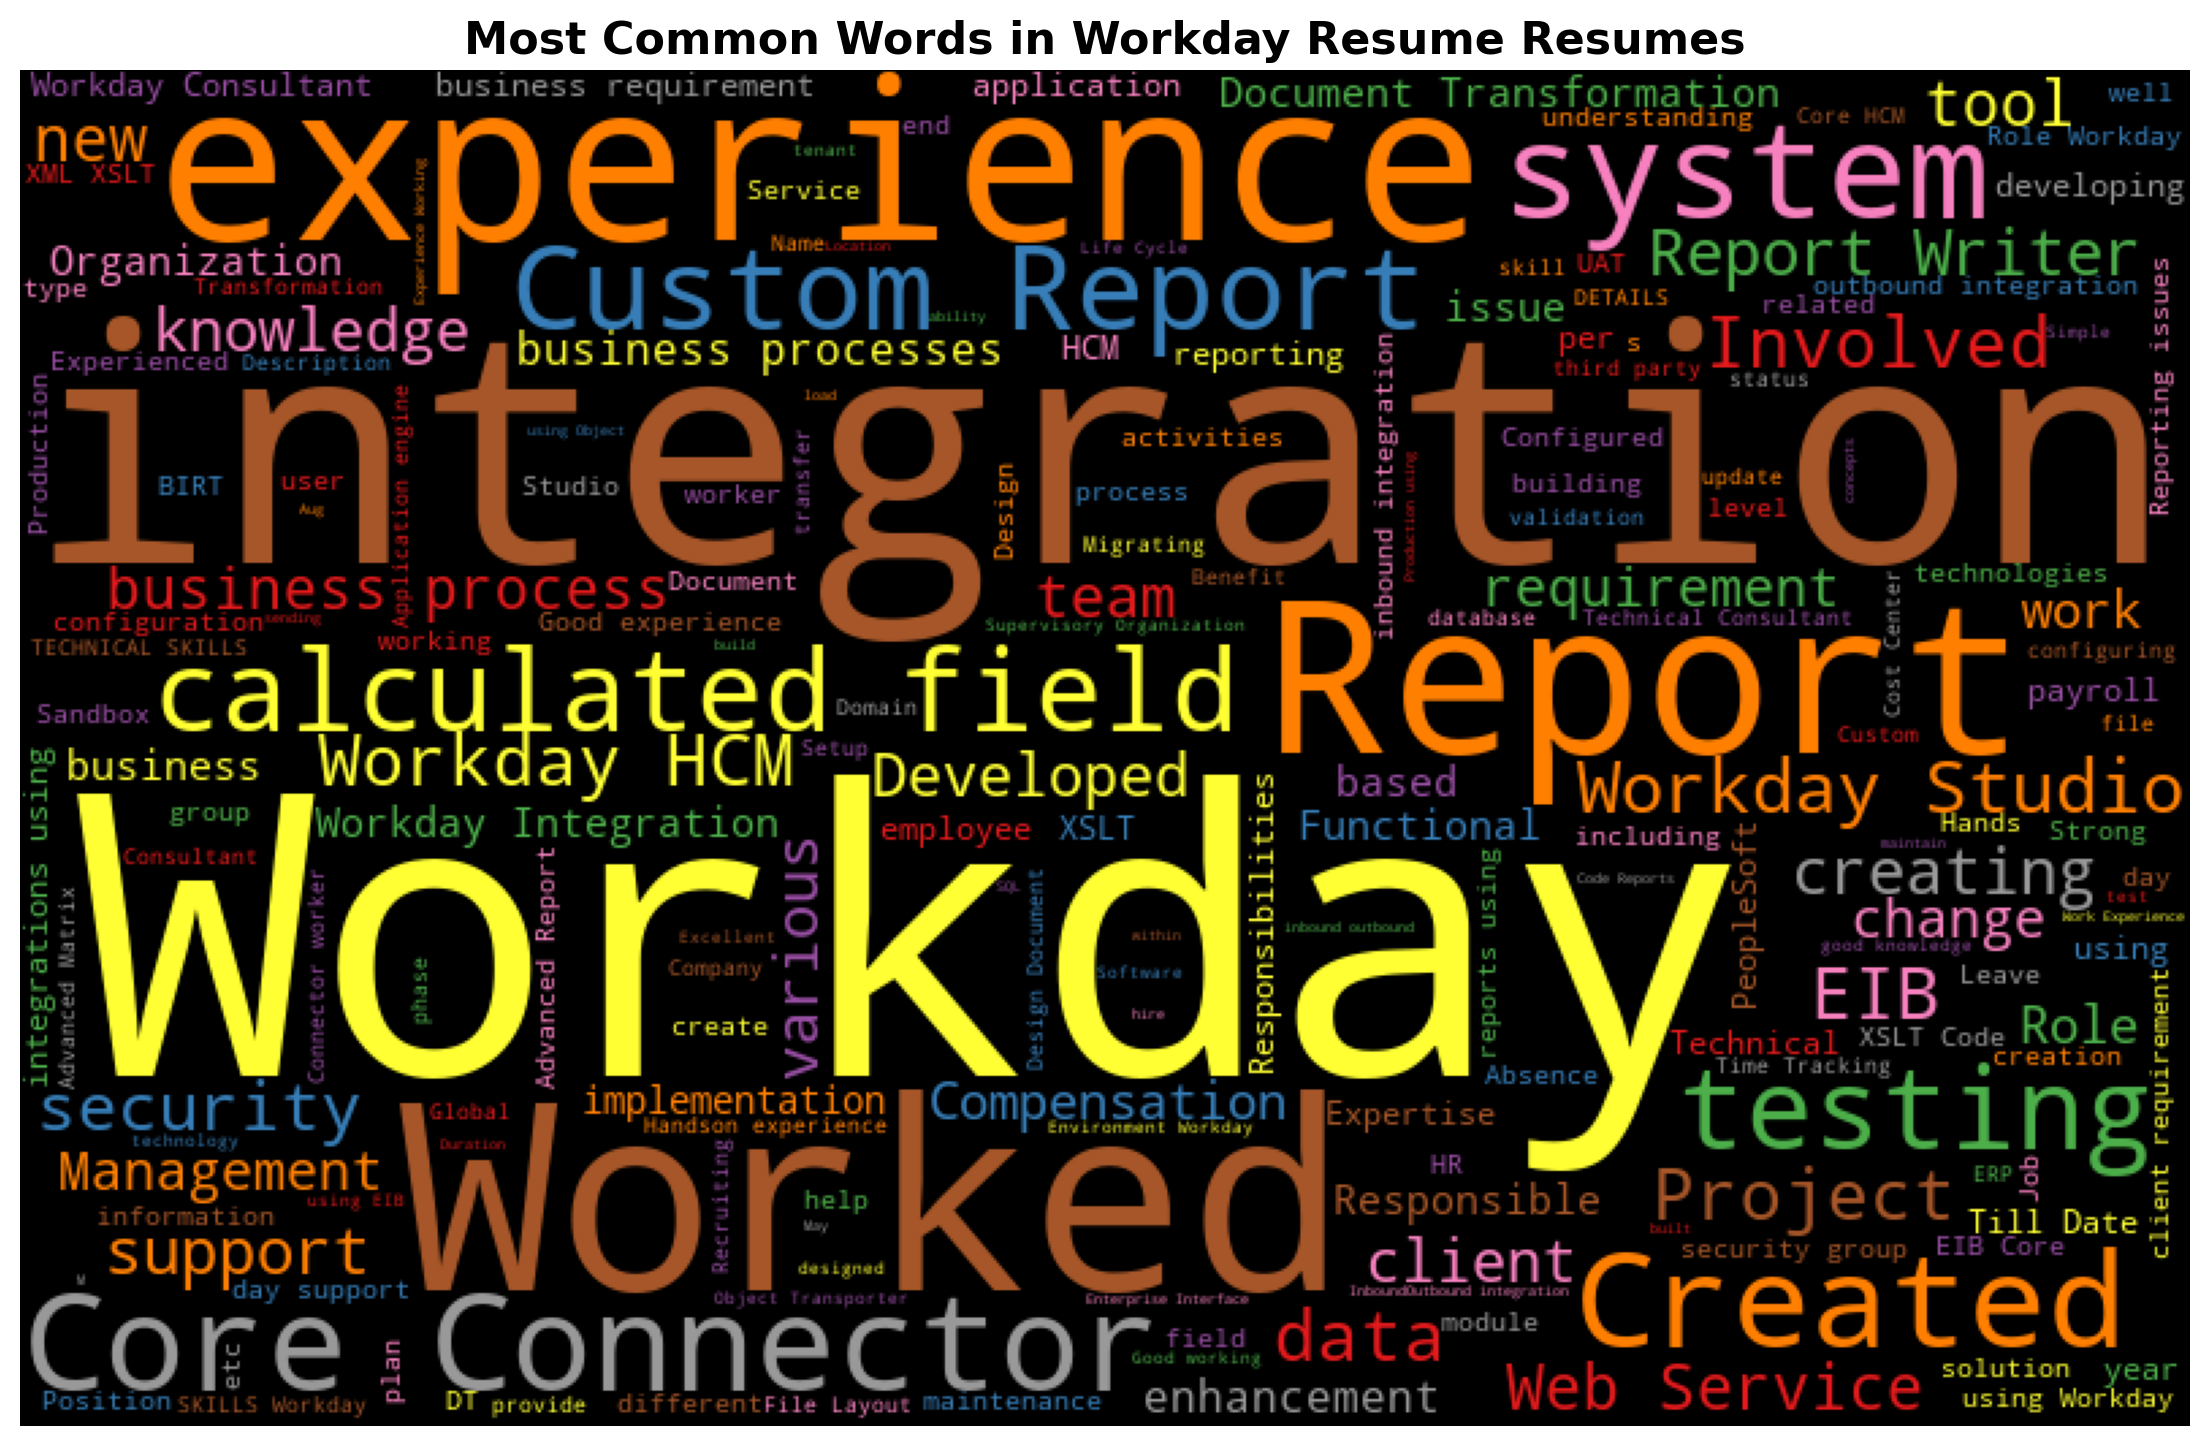

In [30]:
for Category in data.Category.unique():
    all_words = ' '.join([text for text in data['Resumes_text_clean'][data.Category == Category]])
    generate_wordcloud(all_words, Category)

In [31]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

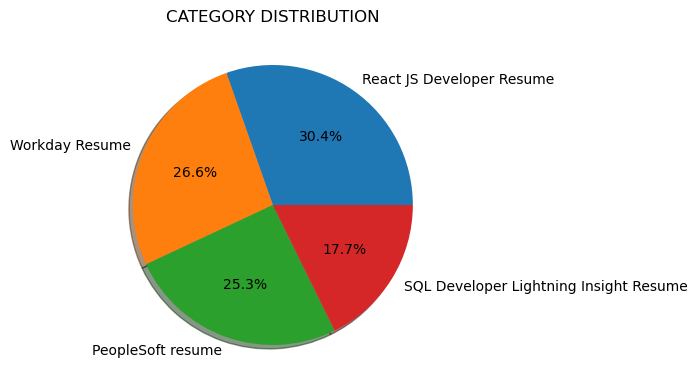

In [32]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(10,10))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20896\3921159928.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Resumes_len"], kde= True, label='Skewness = {:.2f},\nkurtosis = {:.2f},\nmean = {:.2f},\nStandard Deviation = {:.2f}'.format(skew, kurt, mean, std), bins=30).set(title='Word Count in Resumes')


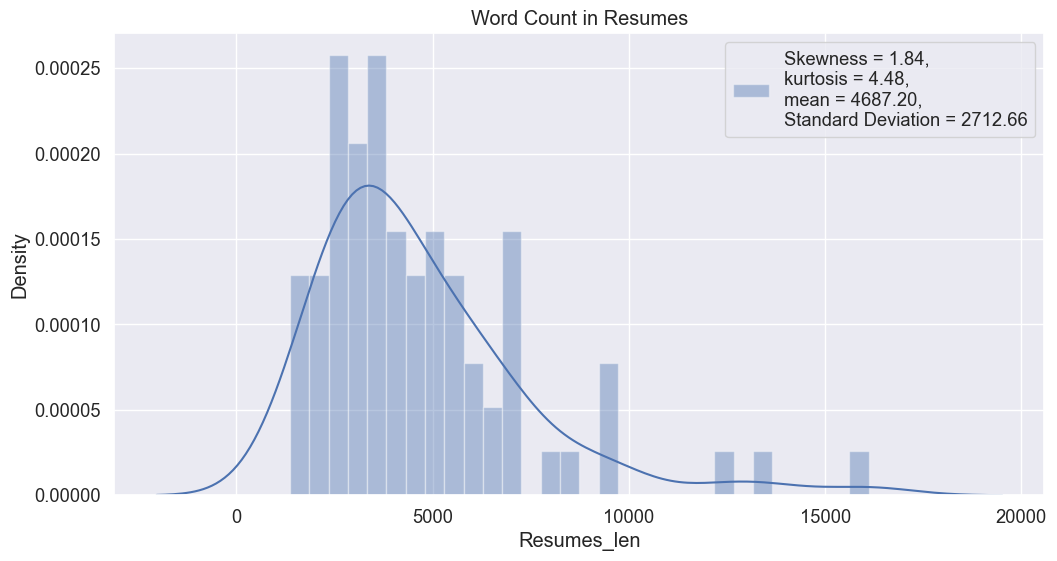

In [33]:
skew = data['Resumes_len'].skew()
kurt = data['Resumes_len'].kurt()
mean = data['Resumes_len'].mean()
std = data['Resumes_len'].std()
plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
sns.distplot(data["Resumes_len"], kde= True, label='Skewness = {:.2f},\nkurtosis = {:.2f},\nmean = {:.2f},\nStandard Deviation = {:.2f}'.format(skew, kurt, mean, std), bins=30).set(title='Word Count in Resumes')
plt.legend(loc='best')
plt.show()

## Label Encoding 

In [34]:
for i, tokens in enumerate(data.Resumes_text_tokenized):
    data.Resumes_text_tokenized[i] = ' '.join(tokens)

data['Absolute_Resumes_text_tokenized'] = data['Resumes_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20896\591598924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Resumes_text_tokenized[i] = ' '.join(tokens)


Resumes  \
0  Name: Ravali P \n\n\n\n                       ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....   

                    Category  \
0  React JS Developer Resume   
1  React JS Developer Resume   
2  React JS Developer Resume   
3  React JS Developer Resume   
4  React JS Developer Resume   

                                  Resumes_text_clean  \
0  Name Ravali P \n\n\n\n                        ...   
1  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...   
2  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...   
3  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
4  KAMALAKAR REDDY A \n\nLinked In httpswwwlinked...   

                              Resumes_text_tokenized  \
0  name ravali p curriculum vitae specialization ...   
1  susovan bag seeking a challenging position in ...   
2  kanumuru deepak reddy career objective to secu...   
3  haripriya battina experience as ui developer i...   
4  kamalakar reddy a linked in httpswwwlinkedinco...   

                                 Resumes_text_nostop  \
0  [name, ravali, p, curriculum, vitae, specializ...   
1  [susovan, bag, seeking, challenging, position,...   
2  [kanumuru, deepak, reddy, career, objective, s...   
3  [haripriya, battina, experience, ui, developer...   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...   

                                 Resumes_text_stemed  \
0  [name, ravali, p, curriculum, vita, special, c...   
1  [susovan, bag, seek, challeng, posit, field, s...   
2  [kanumuru, deepak, reddi, career, object, secu...   
3  [haripriya, battina, experi, ui, develop, reac...   
4  [kamalakar, reddi, link, httpswwwlinkedincomin...   

                             Resumes_text_lemmatized  Resumes_len  punct%  \
0  [name, ravali, p, curriculum, vitae, specializ...         4381     2.2   
1  [susovan, bag, seeking, challenging, position,...         1369     5.6   
2  [kanumuru, deepak, reddy, career, objective, s...         3482     3.9   
3  [haripriya, battina, experience, ui, developer...         2266     3.9   
4  [kamalakar, reddy, linked, httpswwwlinkedincom...         2316     5.4   

                     Absolute_Resumes_text_tokenized  
0  [name, ravali, p, curriculum, vitae, specializ...  
1  [susovan, bag, seeking, a, challenging, positi...  
2  [kanumuru, deepak, reddy, career, objective, t...  
3  [haripriya, battina, experience, as, ui, devel...  
4  [kamalakar, reddy, a, linked, in, httpswwwlink...

In [35]:
data.drop(['Resumes','Resumes_text_clean','Resumes_text_tokenized','Resumes_text_nostop',
           'Resumes_text_stemed','Resumes_text_lemmatized','Resumes_len','punct%'],axis=1,inplace=True)
data

Category  \
0   React JS Developer Resume   
1   React JS Developer Resume   
2   React JS Developer Resume   
3   React JS Developer Resume   
4   React JS Developer Resume   
..                        ...   
74             Workday Resume   
75             Workday Resume   
76             Workday Resume   
77             Workday Resume   
78             Workday Resume   

                      Absolute_Resumes_text_tokenized  
0   [name, ravali, p, curriculum, vitae, specializ...  
1   [susovan, bag, seeking, a, challenging, positi...  
2   [kanumuru, deepak, reddy, career, objective, t...  
3   [haripriya, battina, experience, as, ui, devel...  
4   [kamalakar, reddy, a, linked, in, httpswwwlink...  
..                                                ...  
74  [workday, integration, consultant, name, sri, ...  
75  [srikanth, workday, hcm, consultant, seeking, ...  
76  [workday, hcm, fcm, name, kumar, ss, role, wor...  
77  [venkateswarlub, workday, consultant, professi...  
78  [vinay, kumar, v, workday, functional, consult...  

[79 rows x 2 columns]

In [36]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
data

Category                    Absolute_Resumes_text_tokenized
0          1  [name, ravali, p, curriculum, vitae, specializ...
1          1  [susovan, bag, seeking, a, challenging, positi...
2          1  [kanumuru, deepak, reddy, career, objective, t...
3          1  [haripriya, battina, experience, as, ui, devel...
4          1  [kamalakar, reddy, a, linked, in, httpswwwlink...
..       ...                                                ...
74         3  [workday, integration, consultant, name, sri, ...
75         3  [srikanth, workday, hcm, consultant, seeking, ...
76         3  [workday, hcm, fcm, name, kumar, ss, role, wor...
77         3  [venkateswarlub, workday, consultant, professi...
78         3  [vinay, kumar, v, workday, functional, consult...

[79 rows x 2 columns]

# Model fitting 


### TF - IDF VECTORIZER

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = data['Absolute_Resumes_text_tokenized'].values
requiredTarget = data['Category'].values

# Convert the list of strings to a single string
text_data = [' '.join(text) for text in requiredText]

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
WordFeatures = word_vectorizer.fit_transform(text_data)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, 
                                                    random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 5232), (16, 5232))

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Logistic Regression

In [40]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [41]:
## predections for logistic regression
predict1 = lg.predict(X_test)
predict1

array([1, 2, 1, 3, 1, 1, 1, 0, 2, 3, 1, 3, 3, 0, 0, 2])

In [42]:
## confusion matrix
cm = confusion_matrix(y_test,predict1)
cm

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(43.25, 0.5, 'Truth')

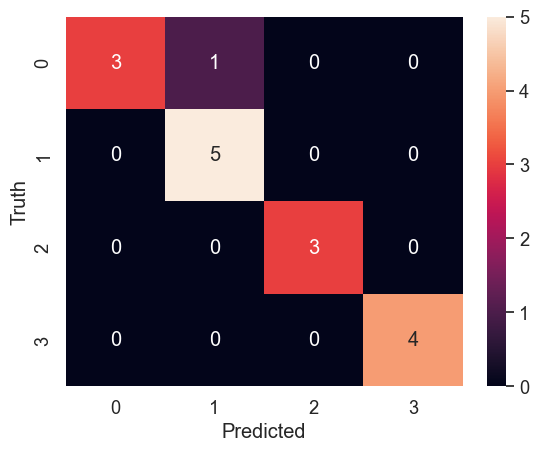

In [43]:
## heate or correlation plot
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
## classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [45]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416


# Support Vector Machine Classifier(SVC)

In [46]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)
predict2

array([1, 2, 1, 3, 1, 1, 1, 0, 2, 3, 1, 3, 3, 0, 0, 2])

In [47]:
## accuracy
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.9375

In [48]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(43.25, 0.5, 'Truth')

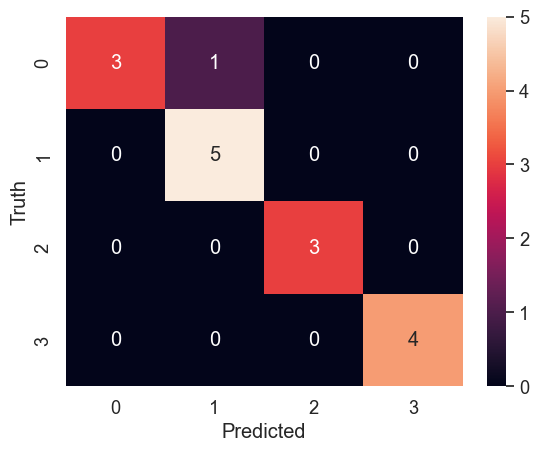

In [49]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [50]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [51]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416


# Random Forest Classifier

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3
cm3 = confusion_matrix(y_test,predict3)
cm3
print(accuracy_3,cm3)

0.9375 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

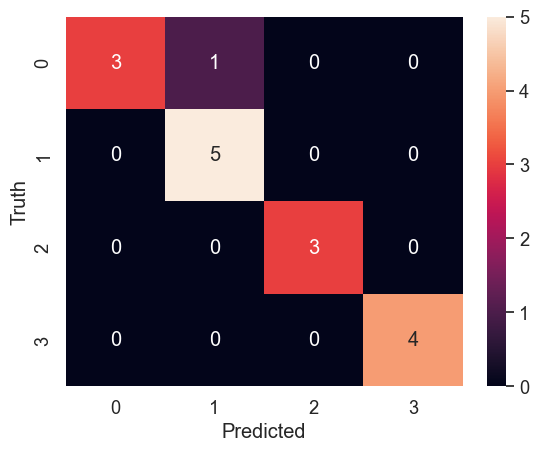

In [53]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [54]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [55]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416


# Naive-Bayes Classifier 

In [56]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)
accuracy_4 = accuracy_score(y_test,predict4)
cm4=confusion_matrix(y_test,predict4)

print(accuracy_4)
print(cm4)

0.875
[[4 0 0 0]
 [0 5 0 0]
 [0 0 1 2]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

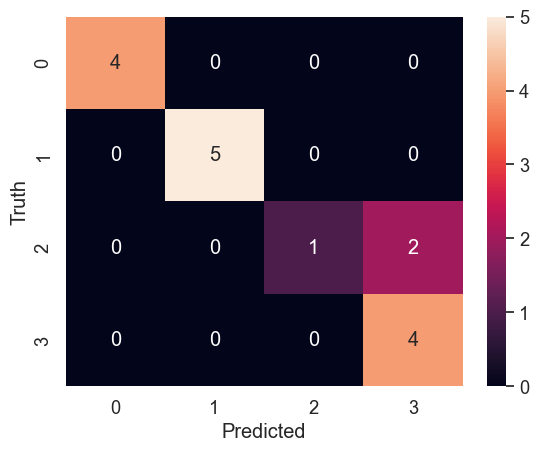

In [57]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [58]:
print(classification_report(y_test,predict4))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.33      0.50         3
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.92      0.83      0.82        16
weighted avg       0.92      0.88      0.86        16



In [59]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.875
Precision Score :  0.9167
Recall Score    :  0.8333
f1-Score        :  0.825


# Decision Tree Classifier

In [60]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)
accuracy_5 = accuracy_score(y_test,predict5)
print(accuracy_5)
cm5=confusion_matrix(y_test,predict5)
print(cm5)

1.0
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

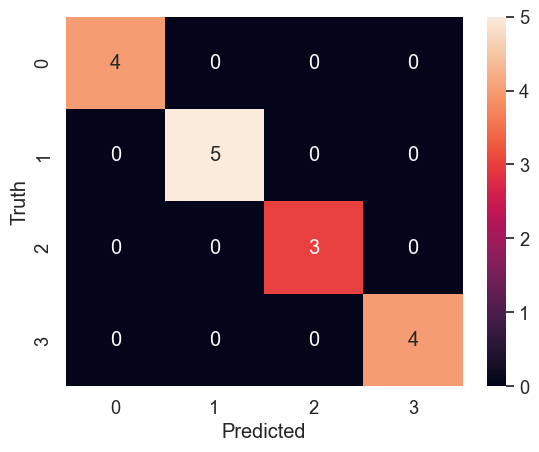

In [61]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [62]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [63]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# AdaBoost Classifier

In [64]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)
accuracy_6 = accuracy_score(y_test,predict6)
print(accuracy_6)
cm6 = confusion_matrix(y_test,predict6)
print(cm6)

0.75
[[0 4 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

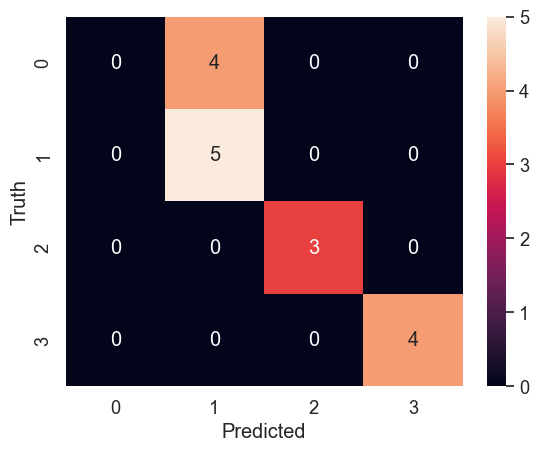

In [65]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [66]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.64      0.75      0.68        16
weighted avg       0.61      0.75      0.66        16



C:\Users\HP\.anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\.anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\.anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.75
Precision Score :  0.6389
Recall Score    :  0.75
f1-Score        :  0.6786


C:\Users\HP\.anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GradientBoosting Classifier

In [68]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)
accuracy_7 = accuracy_score(y_test,predict7)
print(accuracy_7)
cm7 = confusion_matrix(y_test,predict7)
print(cm7)

1.0
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

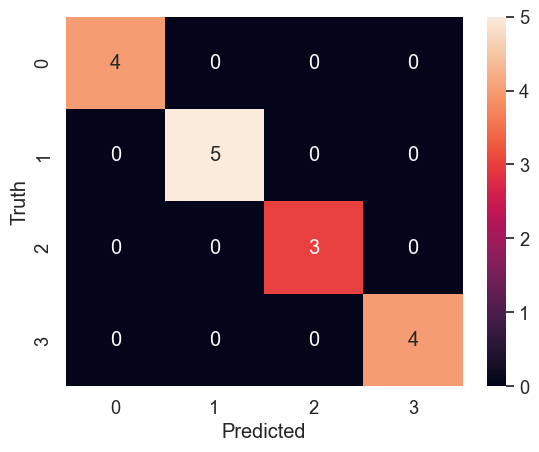

In [69]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [70]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [71]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# XGBoost Classifier

In [72]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)
accuracy_8 = accuracy_score(y_test,predict8)
print(accuracy_8)
cm8 = confusion_matrix(y_test,predict8)
print(cm8)

1.0
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

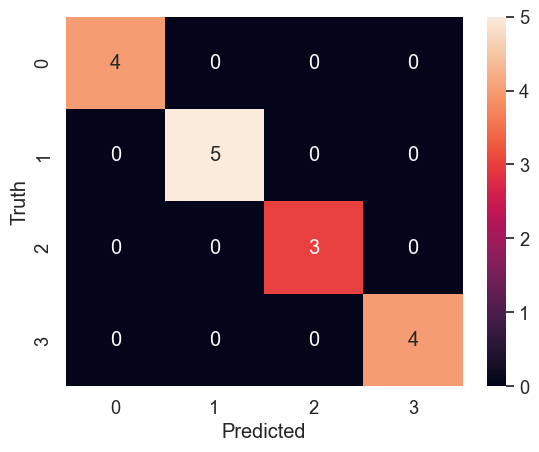

In [73]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [74]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [75]:
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# LGBM-Boosting Classifier

In [76]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)
accuracy_9 = accuracy_score(y_test,predict9)
print(accuracy_9)
cm9 = confusion_matrix(y_test,predict9)
print(cm9)

1.0
[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(43.25, 0.5, 'Truth')

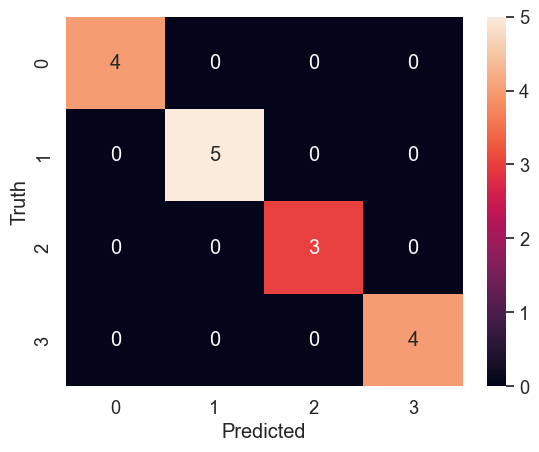

In [77]:
sns.heatmap(cm9,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [78]:
print(classification_report(y_test,predict9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [79]:
accuracy_9 = round(accuracy_score(y_test,predict9),4)
precision_9 = round(precision_score(y_test,predict9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,predict9, average = 'macro'),4)
f1_9 = round(f1_score(y_test,predict9, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [80]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 
                         'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 
                         'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 
                         'Light Gradient Boosting Classifier'], 
         'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6,
                       accuracy_7, accuracy_8, accuracy_9], 'Precision Score' : [precision_1, precision_2, 
                                                                                 precision_3, precision_4, precision_5, 
                                                                                 precision_6, precision_7, precision_8, 
                                                                                 precision_9],
         'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9], 
         'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

Classifier  Accuracy  Precision Score  \
0                  AdaBoost Classifier    0.7500           0.6389   
1               Naive-Bayes Classifier    0.8750           0.9167   
2                  Logistic Regression    0.9375           0.9583   
3                       SVM Classifier    0.9375           0.9583   
4             Random Forest Classifier    0.9375           0.9583   
5             Decision Tree Classifier    1.0000           1.0000   
6         Gradient Boosting Classifier    1.0000           1.0000   
7  Xtreme Gradient Boosting Classifier    1.0000           1.0000   
8   Light Gradient Boosting Classifier    1.0000           1.0000   

   Recall Score  F1_Score  
0        0.7500    0.6786  
1        0.8333    0.8250  
2        0.9375    0.9416  
3        0.9375    0.9416  
4        0.9375    0.9416  
5        1.0000    1.0000  
6        1.0000    1.0000  
7        1.0000    1.0000  
8        1.0000    1.0000

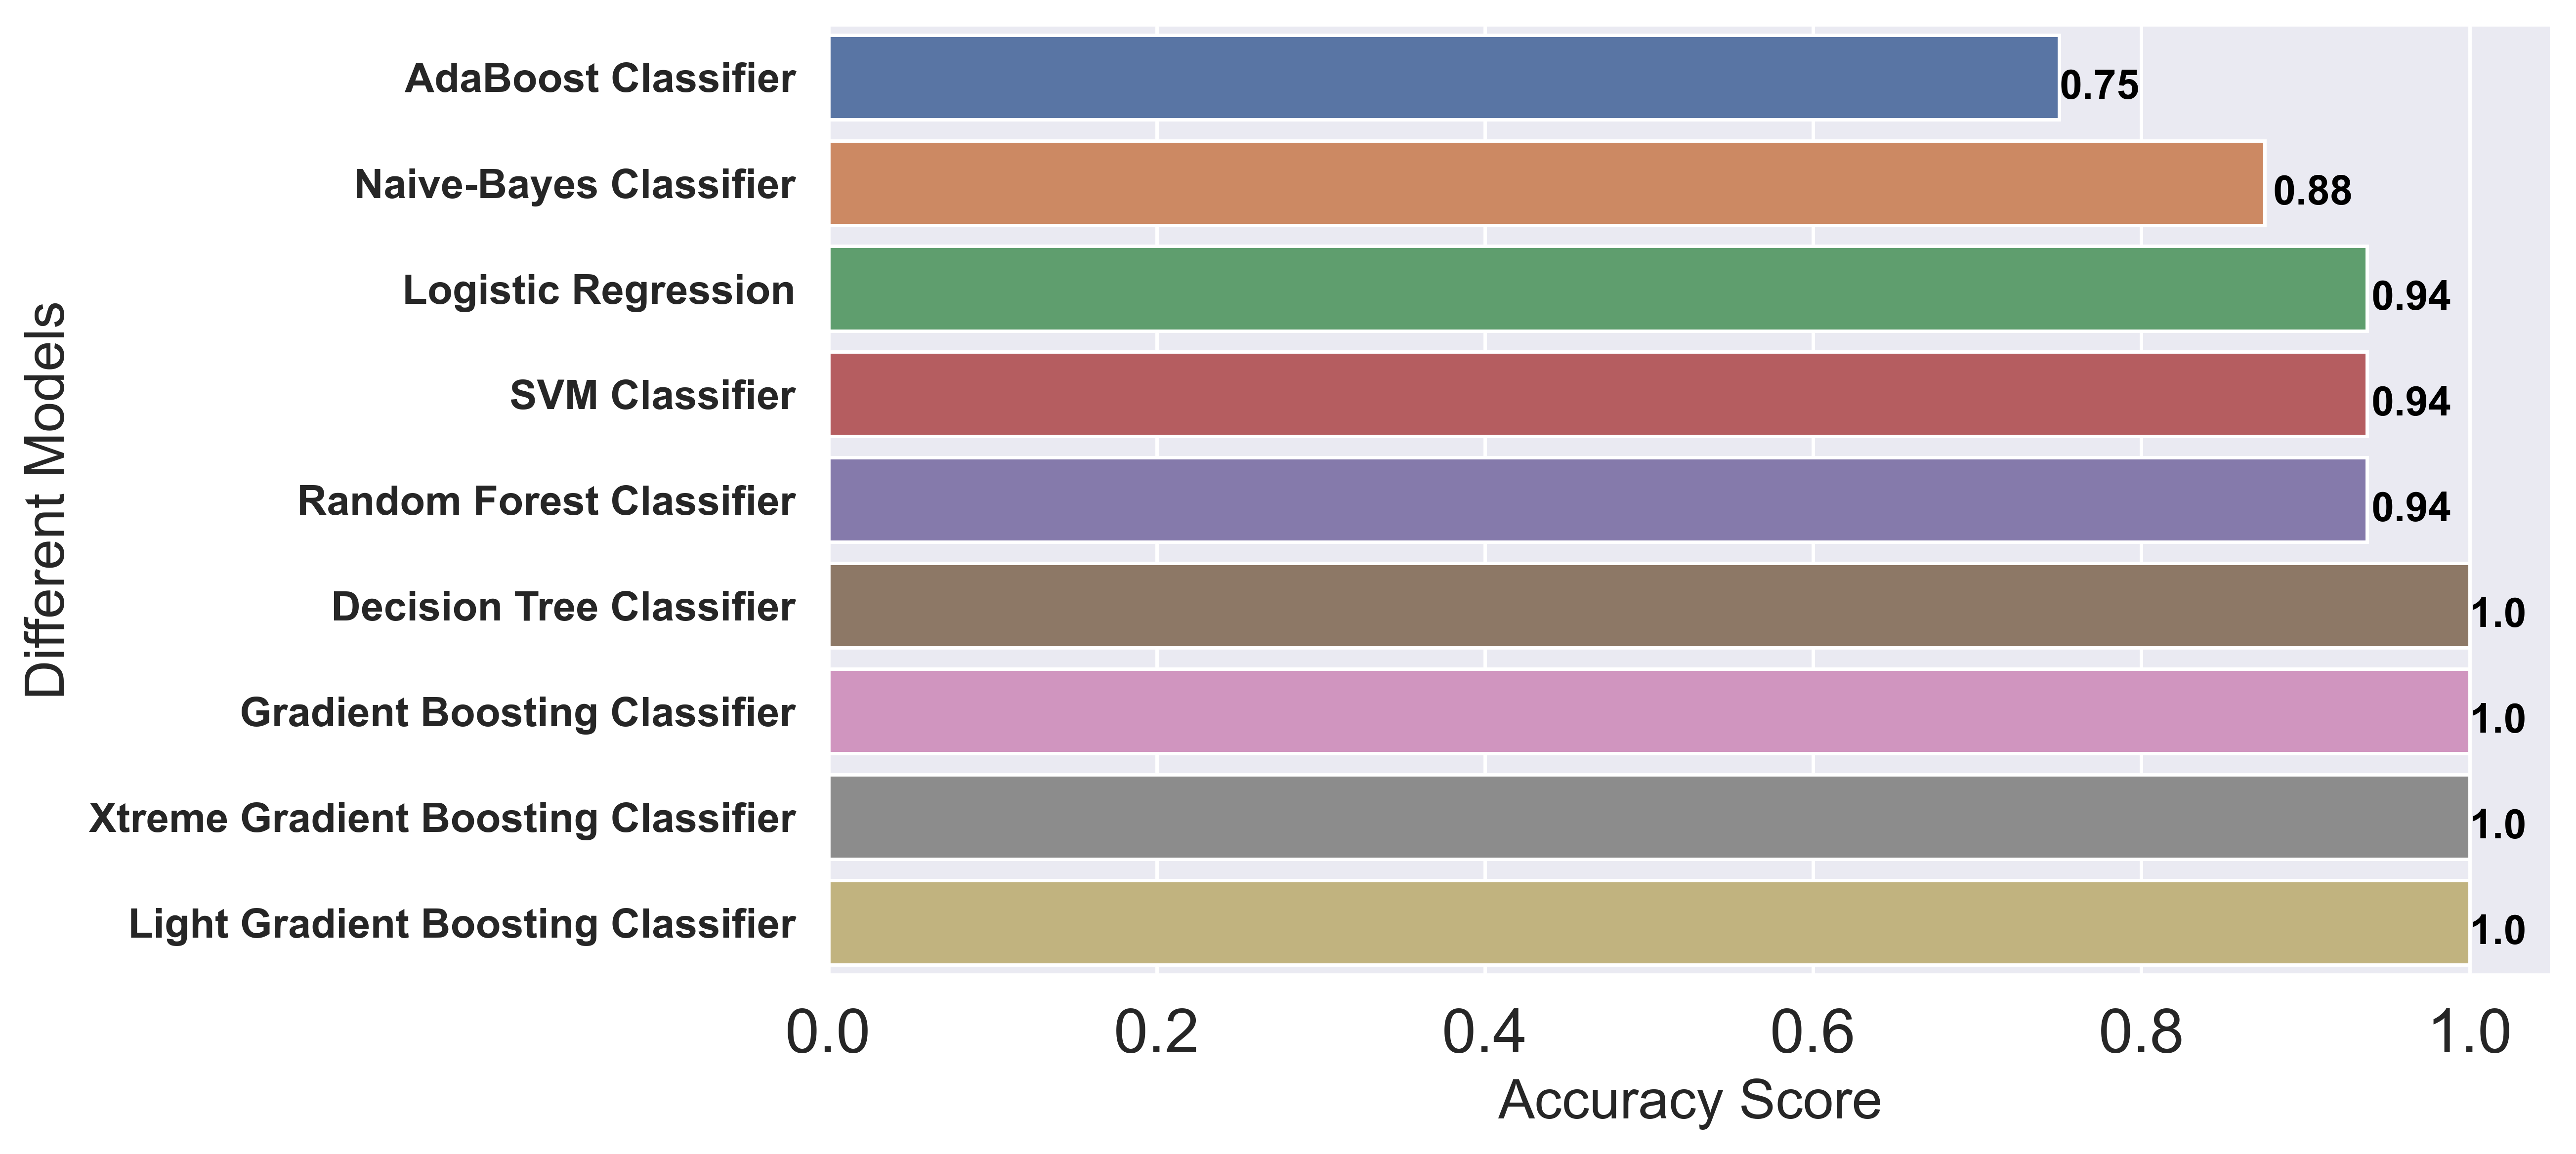

In [81]:
f,axe = plt.subplots(figsize=(9,5),dpi=500)
sns.barplot(x='Accuracy', y='Classifier', data=table, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table.Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()


In [82]:
import pickle

filename = 'vectorizer.pickle'
pickle.dump(xg, open(filename, 'wb'))

In [83]:
## loading the saved model
loaded_model = pickle.load(open('vectorizer.pickle', 'rb'))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)